## Sanju Mathew - Project on Neural Networks

### Objective
* The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network.

#### Task: Data fetching and understanding the train/val/test splits.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import tensorflow
import keras
import h5py
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, BatchNormalization, Dropout
from keras import optimizers, regularizers
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

%matplotlib inline
warnings.filterwarnings("ignore")
tensorflow.__version__

Using TensorFlow backend.


'2.2.0'

In [3]:
Data = h5py.File('/content/drive/My Drive/DLCP/SVHN/data/SVHN_single_grey1.h5','r')
X_train = Data['X_train'][:]
y_train = Data['y_train'][:]
X_test = Data['X_test'][:]
y_test = Data['y_test'][:]
Data.close()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(42000, 32, 32) (42000,) (18000, 32, 32) (18000,)


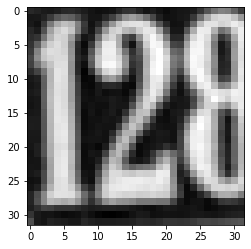

Label:  2


In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.show()
print('Label: ', y_train[0])

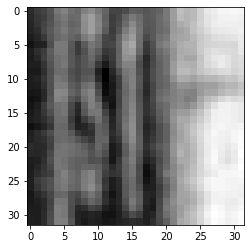

Label:  1


In [5]:
plt.imshow(X_test[0], cmap='gray')
plt.show()
print('Label: ', y_test[0])

In [6]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4186, 4172, 4197, 4281, 4188, 4232, 4168, 4192, 4188, 4196]))

In [7]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1814, 1828, 1803, 1719, 1812, 1768, 1832, 1808, 1812, 1804]))

In [8]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


* Reshape input
* Normalise
* One hot encode labels

In [9]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Task: Implement and apply a deep neural network classifier including feedforward neural network, RELU, activations

In [0]:
# lr = 0.00001
# Lambda = 0
# train_and_test_loop(X_train, y_train, 1, lr, Lambda)

In [0]:
# lr = 0.00001
# Lambda = 1e3
# train_and_test_loop(X_train, y_train, 1, lr, Lambda)

In [0]:
# X_train_subset = X_train[0:20]
# y_train_subset = y_train[0:20]

In [0]:
# lr = 0.001
# Lambda = 0
# train_and_test_loop(X_train_subset, y_train_subset, 500, lr, Lambda)

In [0]:
# lr = 1e-7
# Lambda = 1e-7
# train_and_test_loop(X_train, y_train, 20, lr, Lambda)

In [0]:
# lr = 1e8
# Lambda = 1e-7
# train_and_test_loop(X_train, y_train, 20, lr, Lambda)

In [0]:
# lr = 1e4
# Lambda = 1e-7
# train_and_test_loop(X_train, y_train, 20, lr, Lambda)

In [0]:
def train_and_test_loop_ht(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 0)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

In [0]:
global df_Accuracy_Score
df_Accuracy_Score = pd.DataFrame()

def Score(Model, X_test,y_test, y_labels, Y_pred_cls):
    Metrics, Score = ['Accuracy', 'Precision', 'Recall', 'F1 Score'], []      
    Score.append(str(model.evaluate(X_test,y_test)[1]))
    Score.append(str(precision_score(y_labels, Y_pred_cls, average='macro')))
    Score.append(str(recall_score(y_labels,Y_pred_cls, average='macro')))
    Score.append(str(f1_score(y_labels,Y_pred_cls, average='macro')))
    df_Accuracy_Score['Metrics'], df_Accuracy_Score[Model] = Metrics, Score

In [0]:
# for k in range(1,11):
#     lr = math.pow(10, np.random.uniform(-4.0, 0.0))
#     Lambda = math.pow(10, np.random.uniform(-7,-2))
#     best_acc = train_and_test_loop_ht(100, lr, Lambda, False)
#     print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

In [0]:
# for k in range(1,11):
#     lr = np.random.uniform(0.04, 0.05)
#     Lambda = math.pow(10, np.random.uniform(-8,-5))
#     best_acc = train_and_test_loop_ht(100, lr, Lambda, False)
#     print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

In [0]:
# for k in range(1,11):
#     lr = np.random.uniform(0.045, 0.049)
#     Lambda = np.random.uniform(0.000004,0.0000005)
#     best_acc = train_and_test_loop_ht(100, lr, Lambda, False)
#     print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

#### Hyperparameter Optimization - Coarse to fine tuning
* Check loss range & accuracy
* Overfit a subset of the training data to check if model works
* Identify learning rate & regularization lambda upper and lower limits 
* Hyperparameter tuning
* After completing above steps below learning rate & regularization lambda was finalized for first Neural Network

In [22]:
learning_rate = 0.04765542214558115
Lambda = 2.913984989218504e-06
hidden_nodes = 256
output_nodes = 10

model = Sequential()
model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
model.add(Dense(hidden_nodes, activation='relu'))
model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_split = 0.20, epochs=100, shuffle = True, batch_size=1000, verbose= 2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
 - 1s - loss: 2.3040 - accuracy: 0.1183 - val_loss: 2.2831 - val_accuracy: 0.1499
Epoch 2/100
 - 1s - loss: 2.2342 - accuracy: 0.2255 - val_loss: 2.1654 - val_accuracy: 0.3004
Epoch 3/100
 - 1s - loss: 2.0127 - accuracy: 0.3620 - val_loss: 1.8365 - val_accuracy: 0.4135
Epoch 4/100
 - 1s - loss: 1.7129 - accuracy: 0.4497 - val_loss: 1.6429 - val_accuracy: 0.4693
Epoch 5/100
 - 1s - loss: 1.5286 - accuracy: 0.5010 - val_loss: 1.5291 - val_accuracy: 0.4819
Epoch 6/100
 - 1s - loss: 1.3412 - accuracy: 0.5732 - val_loss: 1.5754 - val_accuracy: 0.4751
Epoch 7/100
 - 1s - loss: 1.3433 - accuracy: 0.5718 - val_loss: 1.1789 - val_accuracy: 0.6365
Epoch 8/100
 - 1s - loss: 1.1476 - accuracy: 0.6473 - val_loss: 1.0976 - val_accuracy: 0.6604
Epoch 9/100
 - 1s - loss: 1.0922 - accuracy: 0.6630 - val_loss: 1.1029 - val_accuracy: 0.6504
Epoch 10/100
 - 1s - loss: 1.0494 - accuracy: 0.6741 - val_loss: 1.0078 - val_accuracy: 0.6943
Epoch 11/1

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_________________________________________________________________


In [24]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 40us/step
Test accuracy:  0.8357222080230713


In [25]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
y_labels = np.argmax(y_test, axis=1)
print('Accuracy: '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_labels,Y_pred_cls, average='macro')))
print('Precision_score: ' + str(precision_score(y_labels, Y_pred_cls, average='macro')))
print('F-score: ' + str(f1_score(y_labels,Y_pred_cls, average='macro')))
Score('NN', X_test,y_test, y_labels, Y_pred_cls)
confusion_matrix(y_labels, Y_pred_cls)

18000/18000 [==============================] - 1s 43us/step
Accuracy: 0.8357222080230713
Recall_score: 0.8355198542572433
Precision_score: 0.8379401971779197
F-score: 0.8358035411444584
18000/18000 [==============================] - 1s 42us/step


array([[1638,   16,    7,   25,   16,    5,   33,   13,   25,   36],
       [  30, 1558,   20,   42,   38,    6,   32,   53,   33,   16],
       [  31,   18, 1484,   63,   25,   17,   10,   68,   35,   52],
       [  18,   23,   17, 1427,    7,   83,   41,   33,   37,   33],
       [  31,   38,   21,   33, 1533,   12,   51,   12,   43,   38],
       [  29,   10,    8,  128,    8, 1386,   83,    7,   63,   46],
       [  50,   17,   14,   24,   23,   40, 1545,   10,   90,   19],
       [  34,   63,   28,   42,   10,    6,   14, 1575,   12,   24],
       [  33,   24,   21,   70,   13,   27,   97,   13, 1467,   47],
       [  89,   23,   17,   56,   18,   56,   26,   25,   64, 1430]])

#### Task: Implementing batch normalization for training the neural network

In [0]:
def train_and_test_loop_ht(iterations, lr, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(hidden_nodes))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(output_nodes))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = lr)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 0)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

In [0]:
# for k in range(1,11):
#     lr = math.pow(10, np.random.uniform(-4.0, -1.0))
#     best_acc = train_and_test_loop_ht(100, lr, False)
#     print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}\n".format(k, 10, best_acc, lr))

* Batch Normalization & Adam optimizer applied 
* Multiple rounds of hyperparameter tuning completed
* After completing above steps below learning rate was finalized for second Neural Network with batch normalization

In [28]:
learning_rate = 0.006217387305341968
hidden_nodes = 256
output_nodes = 10

model = Sequential()
model.add(Dense(hidden_nodes, input_shape=(1024,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(hidden_nodes))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(output_nodes))
model.add(Activation('softmax'))

adam = optimizers.Adam(lr = learning_rate)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_split = 0.20, epochs=100, shuffle = True, batch_size=1000, verbose= 2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
 - 2s - loss: 1.7519 - accuracy: 0.4173 - val_loss: 2.6617 - val_accuracy: 0.2676
Epoch 2/100
 - 2s - loss: 1.0370 - accuracy: 0.6762 - val_loss: 1.4875 - val_accuracy: 0.5290
Epoch 3/100
 - 2s - loss: 0.8608 - accuracy: 0.7319 - val_loss: 1.3706 - val_accuracy: 0.5570
Epoch 4/100
 - 2s - loss: 0.7362 - accuracy: 0.7709 - val_loss: 1.4252 - val_accuracy: 0.5719
Epoch 5/100
 - 2s - loss: 0.6473 - accuracy: 0.7979 - val_loss: 1.3231 - val_accuracy: 0.6031
Epoch 6/100
 - 2s - loss: 0.5953 - accuracy: 0.8140 - val_loss: 1.3795 - val_accuracy: 0.5727
Epoch 7/100
 - 2s - loss: 0.5692 - accuracy: 0.8222 - val_loss: 1.5360 - val_accuracy: 0.5790
Epoch 8/100
 - 2s - loss: 0.5254 - accuracy: 0.8361 - val_loss: 1.5399 - val_accuracy: 0.5964
Epoch 9/100
 - 2s - loss: 0.4953 - accuracy: 0.8434 - val_loss: 1.2605 - val_accuracy: 0.6119
Epoch 10/100
 - 2s - loss: 0.4507 - accuracy: 0.8585 - val_loss: 1.5356 - val_accuracy: 0.6018
Epoch 11/1

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               262400    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [30]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 44us/step
Test accuracy:  0.8146666884422302


In [31]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
y_labels = np.argmax(y_test, axis=1)
print('Accuracy: '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_labels,Y_pred_cls, average='macro')))
print('Precision_score: ' + str(precision_score(y_labels, Y_pred_cls, average='macro')))
print('F-score: ' + str(f1_score(y_labels,Y_pred_cls, average='macro')))
Score('NNBN', X_test,y_test, y_labels, Y_pred_cls)
confusion_matrix(y_labels, Y_pred_cls)

18000/18000 [==============================] - 1s 44us/step
Accuracy: 0.8146666884422302
Recall_score: 0.8146233095623353
Precision_score: 0.8220514983678102
F-score: 0.815625369039197
18000/18000 [==============================] - 1s 44us/step


array([[1633,   24,    6,   27,   12,    9,   24,   10,   21,   48],
       [  56, 1541,    7,   67,   41,    9,   23,   28,   27,   29],
       [  34,   40, 1382,  123,   31,   21,    6,   57,   44,   65],
       [  29,   36,   18, 1405,   12,   96,   23,   22,   37,   41],
       [  57,   69,   16,   48, 1487,   15,   48,    6,   21,   45],
       [  33,   18,    8,  130,   10, 1417,   60,    7,   34,   51],
       [ 103,   22,    9,   46,   26,   55, 1436,    7,   96,   32],
       [  45,   87,   10,   77,   11,    7,   13, 1511,   15,   32],
       [  76,   33,    9,   81,   12,   36,   74,    3, 1404,   84],
       [ 109,   26,    9,   79,   18,   34,   21,   18,   42, 1448]])

#### Task: Since model is overfitting in both cases implementing data augmentation to improve performance
* Image intensity rescale: Stretching or shrinking image intensity levels
* Filter Otsu Threshold: Mask threshold value based on Otsu's method

In [0]:
from skimage import img_as_float, exposure, filters
def data_aug_X(X):
    Y, Z = np.zeros(shape=(0, 1024)), np.zeros(shape=(0, 1024))
    for img in X:
        p2, p98 = np.percentile(img, (2, 98))
        img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
        val = filters.threshold_otsu(img)
        mask = img < val
        Y = np.append(Y, [img_rescale], axis = 0)
        Z = np.append(Z, [mask.astype(int)], axis = 0)
    X = np.append(X, Y, axis = 0)
    X = np.append(X, Z, axis = 0)
    return X

def data_aug_y(y):
    Y = np.append(y, y, axis = 0)
    y = np.append(Y, y, axis = 0)
    return y

In [33]:
X_train = data_aug_X(X_train)
y_train = data_aug_y(y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(126000, 1024) (18000, 1024) (126000, 10) (18000, 10)


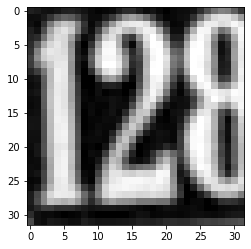

Label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [34]:
plt.imshow(X_train[42000].reshape(32, 32), cmap='gray')
plt.show()
print('Label: ', y_train[42000])

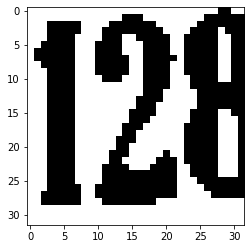

Label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [35]:
plt.imshow(X_train[84000].reshape(32, 32), cmap='gray')
plt.show()
print('Label: ', y_train[84000])

In [0]:
def train_and_test_loop_ht(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 0)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

In [0]:
# for k in range(1,11):
#     lr = math.pow(10, np.random.uniform(-4.0, 0.0))
#     Lambda = math.pow(10, np.random.uniform(-7,-2))
#     best_acc = train_and_test_loop_ht(100, lr, Lambda, False)
#     print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

In [0]:
# for k in range(1,11):
#     lr = math.pow(10, np.random.uniform(-3.0, -1.0))
#     Lambda = math.pow(10, np.random.uniform(-7,-4))
#     best_acc = train_and_test_loop_ht(100, lr, Lambda, False)
#     print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

In [0]:
# for k in range(1,11):
#     lr = np.random.uniform(0.05, 0.07)
#     Lambda = math.pow(10, np.random.uniform(-6,-4))
#     best_acc = train_and_test_loop_ht(100, lr, Lambda, False)
#     print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

#### Hyperparameter Optimization - Coarse to fine tuning for data augmented model
* Check loss range & accuracy
* Overfit a subset of the training data to check if model works
* Identify learning rate & regularization lambda upper and lower limits 
* Hyperparameter tuning
* After completing above steps below learning rate & regularization lambda was finalized for third Neural Network with data augmentation

In [40]:
learning_rate = 0.05726525291756939
hidden_nodes = 256
output_nodes = 10
Lambda = 8.231254283285364e-05

model = Sequential()
model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
model.add(Dense(hidden_nodes, activation='relu'))
model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_split = 0.20, epochs=100, shuffle = True, batch_size=1000, verbose= 2)

Train on 100800 samples, validate on 25200 samples
Epoch 1/100
 - 4s - loss: 1.8184 - accuracy: 0.3984 - val_loss: 1.2582 - val_accuracy: 0.6229
Epoch 2/100
 - 4s - loss: 1.1252 - accuracy: 0.6651 - val_loss: 1.0713 - val_accuracy: 0.6917
Epoch 3/100
 - 4s - loss: 0.9451 - accuracy: 0.7244 - val_loss: 0.9784 - val_accuracy: 0.7318
Epoch 4/100
 - 4s - loss: 0.8233 - accuracy: 0.7636 - val_loss: 0.8998 - val_accuracy: 0.7514
Epoch 5/100
 - 4s - loss: 0.7512 - accuracy: 0.7855 - val_loss: 0.8850 - val_accuracy: 0.7675
Epoch 6/100
 - 4s - loss: 0.6917 - accuracy: 0.8023 - val_loss: 0.8894 - val_accuracy: 0.7726
Epoch 7/100
 - 4s - loss: 0.6585 - accuracy: 0.8111 - val_loss: 0.8743 - val_accuracy: 0.7788
Epoch 8/100
 - 4s - loss: 0.6143 - accuracy: 0.8238 - val_loss: 0.8463 - val_accuracy: 0.7850
Epoch 9/100
 - 4s - loss: 0.5783 - accuracy: 0.8346 - val_loss: 0.8678 - val_accuracy: 0.7855
Epoch 10/100
 - 6s - loss: 0.5506 - accuracy: 0.8426 - val_loss: 0.8439 - val_accuracy: 0.7911
Epoch 11

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_________________________________________________________________


In [42]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 46us/step
Test accuracy:  0.8573333621025085


In [43]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
y_labels = np.argmax(y_test, axis=1)
print('Accuracy: '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_labels,Y_pred_cls, average='macro')))
print('Precision_score: ' + str(precision_score(y_labels, Y_pred_cls, average='macro')))
print('F-score: ' + str(f1_score(y_labels,Y_pred_cls, average='macro')))
Score('NNDA', X_test,y_test, y_labels, Y_pred_cls)
confusion_matrix(y_labels, Y_pred_cls)

18000/18000 [==============================] - 1s 38us/step
Accuracy: 0.8573333621025085
Recall_score: 0.857126883928298
Precision_score: 0.8588120391216251
F-score: 0.857399888585852
18000/18000 [==============================] - 1s 39us/step


array([[1611,   15,   20,   23,   15,    6,   26,   17,   41,   40],
       [  25, 1540,   44,   42,   31,   11,   19,   59,   40,   17],
       [  17,    9, 1603,   44,   14,    8,    6,   36,   41,   25],
       [  15,   18,   50, 1417,    4,   83,   25,   30,   54,   23],
       [  16,   45,   21,   27, 1563,   16,   36,   17,   38,   33],
       [  16,    8,   17,   87,    8, 1467,   71,   11,   65,   18],
       [  33,   15,   12,   21,   17,   47, 1556,   15,  104,   12],
       [  12,   30,   46,   26,    6,   13,   13, 1632,    9,   21],
       [  30,   24,   29,   42,    5,   21,   59,   10, 1555,   37],
       [  59,   18,   36,   44,   17,   41,   13,   27,   61, 1488]])

#### Task: Implementing batch normalization for training the neural network with data augmentation

In [0]:
def train_and_test_loop_ht(iterations, lr, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(hidden_nodes))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(output_nodes))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = lr)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 0)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

In [0]:
# for k in range(1,11):
#     lr = math.pow(10, np.random.uniform(-4.0, -1.0))
#     best_acc = train_and_test_loop_ht(100, lr, False)
#     print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}\n".format(k, 10, best_acc, lr))

* Batch Normalization & Adam optimizer applied 
* Multiple rounds of hyperparameter tuning completed
* After completing above steps below learning rate was finalized for fourth Neural Network with batch normalization & data augmentation

In [46]:
learning_rate = 0.0001171682966818011
hidden_nodes = 256
output_nodes = 10

model = Sequential()
model.add(Dense(hidden_nodes, input_shape=(1024,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(hidden_nodes))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(output_nodes))
model.add(Activation('softmax'))

adam = optimizers.Adam(lr = learning_rate)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_split = 0.20, epochs=100, shuffle = True, batch_size=1000, verbose= 2)

Train on 100800 samples, validate on 25200 samples
Epoch 1/100
 - 5s - loss: 1.9588 - accuracy: 0.3544 - val_loss: 1.6636 - val_accuracy: 0.4906
Epoch 2/100
 - 5s - loss: 1.3640 - accuracy: 0.6252 - val_loss: 1.2240 - val_accuracy: 0.6121
Epoch 3/100
 - 5s - loss: 1.1089 - accuracy: 0.7065 - val_loss: 1.0590 - val_accuracy: 0.6617
Epoch 4/100
 - 5s - loss: 0.9610 - accuracy: 0.7452 - val_loss: 0.9820 - val_accuracy: 0.6838
Epoch 5/100
 - 5s - loss: 0.8551 - accuracy: 0.7707 - val_loss: 0.9299 - val_accuracy: 0.7061
Epoch 6/100
 - 5s - loss: 0.7718 - accuracy: 0.7915 - val_loss: 0.8945 - val_accuracy: 0.7202
Epoch 7/100
 - 5s - loss: 0.7061 - accuracy: 0.8075 - val_loss: 0.8760 - val_accuracy: 0.7277
Epoch 8/100
 - 5s - loss: 0.6516 - accuracy: 0.8223 - val_loss: 0.8447 - val_accuracy: 0.7408
Epoch 9/100
 - 5s - loss: 0.6068 - accuracy: 0.8341 - val_loss: 0.8428 - val_accuracy: 0.7459
Epoch 10/100
 - 5s - loss: 0.5692 - accuracy: 0.8439 - val_loss: 0.8307 - val_accuracy: 0.7522
Epoch 11

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               262400    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [48]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 53us/step
Test accuracy:  0.8172777891159058


In [49]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
y_labels = np.argmax(y_test, axis=1)
print('Accuracy: '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_labels,Y_pred_cls, average='macro')))
print('Precision_score: ' + str(precision_score(y_labels, Y_pred_cls, average='macro')))
print('F-score: ' + str(f1_score(y_labels,Y_pred_cls, average='macro')))
Score('NNBNDA', X_test,y_test, y_labels, Y_pred_cls)
confusion_matrix(y_labels, Y_pred_cls)

18000/18000 [==============================] - 1s 53us/step
Accuracy: 0.8172777891159058
Recall_score: 0.8175374298264956
Precision_score: 0.8329700016140714
F-score: 0.8196344612152201
18000/18000 [==============================] - 1s 51us/step


array([[1556,   24,    7,   38,   15,    7,    7,   10,   12,  138],
       [  29, 1515,   15,   73,   35,   16,   10,   44,   12,   79],
       [  28,   21, 1482,   76,   19,   11,    1,   38,   23,  104],
       [  15,   14,   16, 1464,   11,   77,   11,   21,   18,   72],
       [  19,   56,   23,   50, 1494,   23,   17,   11,   13,  106],
       [  13,   12,    5,  156,    8, 1428,   21,   12,   21,   92],
       [  61,   19,   12,   57,   23,  120, 1363,   18,   79,   80],
       [  31,   60,   46,   73,    9,   11,    4, 1498,   12,   64],
       [  41,   30,   13,  149,   11,   52,   29,    4, 1292,  191],
       [  28,   16,   12,   48,   14,   30,    9,   16,   12, 1619]])

#### Task: Print the classification accuracy metrics

In [50]:
df_Accuracy_Score.set_index('Metrics')

,NN,NNBN,NNDA,NNBNDA
Metrics,,,,
Accuracy,0.8357222080230713,0.8146666884422302,0.8573333621025085,0.8172777891159058
Precision,0.8379401971779197,0.8220514983678102,0.8588120391216251,0.8329700016140714
Recall,0.8355198542572433,0.8146233095623353,0.857126883928298,0.8175374298264956
F1 Score,0.8358035411444584,0.815625369039197,0.857399888585852,0.8196344612152201


#### Summary
Four models were created
* Neural Network (NN)
* Neural Network with Batch Normalization (NNBN)
* Neural Network with Data Augmentation (NNDA)
* Neural Network with Batch Normalization & Data Augmentation (NNBNDA)
* Out of the four models neural network with data augmentation appears to be performing better with 85.7% accuracy on test data
* Model is still overfit and further exploration can lead to better performance